# Visualisation cartographique des publications

In [1]:
#import librairies

import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
from shapely.geometry import Point, Polygon
import geopandas as gpd
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt

In [2]:
#import tables

df = pd.read_csv(' ', index_col=0)
dfArt = pd.read_csv(' ', index_col=0)
dfEso = pd.read_csv(' ', index_col=0)

print(f'df = {len(df)} publications\ndfArt = {len(dfArt)} publications\ndfEso = {len(dfEso)} publications')

/Users/JR/.pyenv/versions/3.8.7/envs/img/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


df = 236069 publications
dfArt = 11639 publications
dfEso = 6185 publications


In [ ]:
# Table de base

df.head()

In [ ]:
# Table "art"

dfArt.head()

In [ ]:
# Table "ésotérisme"

dfEso.head()

# Cartographier toutes les données


* Nettoyer et homogénéiser la dataframe
* Transformation du nom en coordonnées
* Visualisation cartographique

In [3]:
df.name.value_counts()

Namibia           222509
United States       2659
Brazil               859
United Kingdom       855
India                627
                   ...  
Barbados               1
Nepal                  1
Angola                 1
Bahrain                1
Jamaica                1
Name: name, Length: 144, dtype: int64

In [4]:
df.country.value_counts()

US    2659
BR     859
GB     855
IN     627
FR     603
      ... 
HT       1
NP       1
         1
MG       1
BN       1
Name: country, Length: 146, dtype: int64

Différence entre le passage de l'ISO (référencement à deux lettre d'un pays) au nom du pays.
Vraisemblablement, la Nambibie n'est pas en haut du classement.

In [5]:
#Nettoyage

df = df[df.name != 'Namibia']
df = df.dropna(subset=['name'])

print(f'Publications avec localisation : {len(df)}')

Publications avec localisation : 13553


In [6]:
#Compter les pays

countries = Counter(df['name'].sort_values(ascending=True).tolist()).most_common(150)
countries

[('United States', 2659),
 ('Brazil', 859),
 ('United Kingdom', 855),
 ('India', 627),
 ('France', 603),
 ('Italy', 602),
 ('Argentina', 574),
 ('Germany', 436),
 ('Japan', 418),
 ('Spain', 394),
 ('Russian Federation', 381),
 ('Mexico', 358),
 ('Iran Islamic Republic of', 312),
 ('Canada', 307),
 ('Colombia', 289),
 ('Turkey', 257),
 ('Australia', 241),
 ('Ukraine', 218),
 ('Chile', 217),
 ('Indonesia', 158),
 ('Poland', 153),
 ('Korea Republic of', 123),
 ('Peru', 116),
 ('Belgium', 111),
 ('Netherlands', 102),
 ('Algeria', 89),
 ('Venezuela Bolivarian Republic of', 87),
 ('Romania', 78),
 ('Switzerland', 74),
 ('Singapore', 73),
 ('Thailand', 73),
 ('Greece', 72),
 ('Ecuador', 61),
 ('Portugal', 61),
 ('Sweden', 60),
 ('Hungary', 58),
 ('Viet Nam', 53),
 ('Denmark', 51),
 ('Philippines', 50),
 ('Taiwan Province of China', 50),
 ('Austria', 48),
 ('Malaysia', 47),
 ('Norway', 46),
 ('Ireland', 45),
 ('Croatia', 37),
 ('Czech Republic', 37),
 ('Hong Kong', 36),
 ('New Zealand', 34),
 

In [7]:
#Créer une dataframe pour les pays

df_name = pd.DataFrame(countries, columns=['name', 'count']) 
df_name.head()

,name,count
0,United States,2659
1,Brazil,859
2,United Kingdom,855
3,India,627
4,France,603


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'India'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Argentina'),
  Text(7, 0

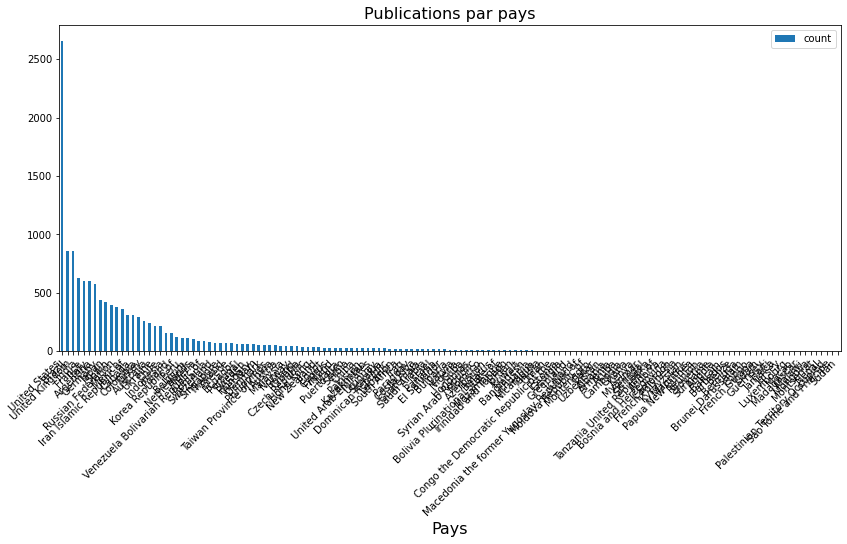

In [8]:
#Visualisation de publications par pays

ax = df_name.set_index("name").plot(kind = "bar", figsize=(14,6))
ax.set_xlabel("Pays", fontsize=16)
plt.title("Publications par pays", fontsize=16)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize=10)

In [9]:
#Transformation des noms

list_countries = df_name['name'].to_list()
gdf = gpd.tools.geocode(list_countries, provider='nominatim',timeout=10, user_agent=" ")

In [10]:
gdf["count"]=df_name["count"]
gdf.head()

,geometry,address,count
0,POINT (-100.44588 39.78373),United States,2659
1,POINT (-53.20000 -10.33333),Brasil,859
2,POINT (-3.27658 54.70235),United Kingdom,855
3,POINT (78.66774 22.35111),India,627
4,POINT (1.88833 46.60335),France,603


<AxesSubplot:>

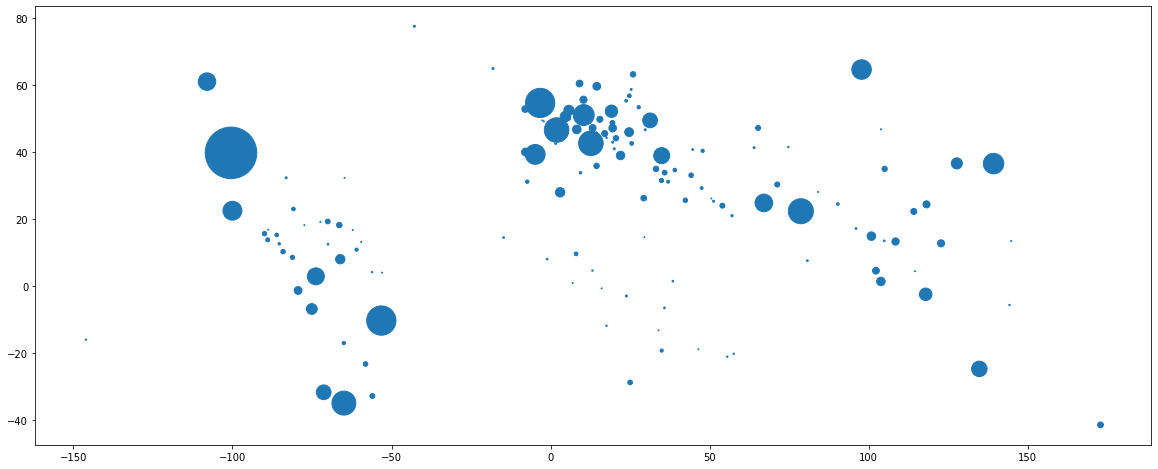

In [11]:
gdf.plot(markersize=gdf['count'], figsize=(20,10))

<AxesSubplot:>

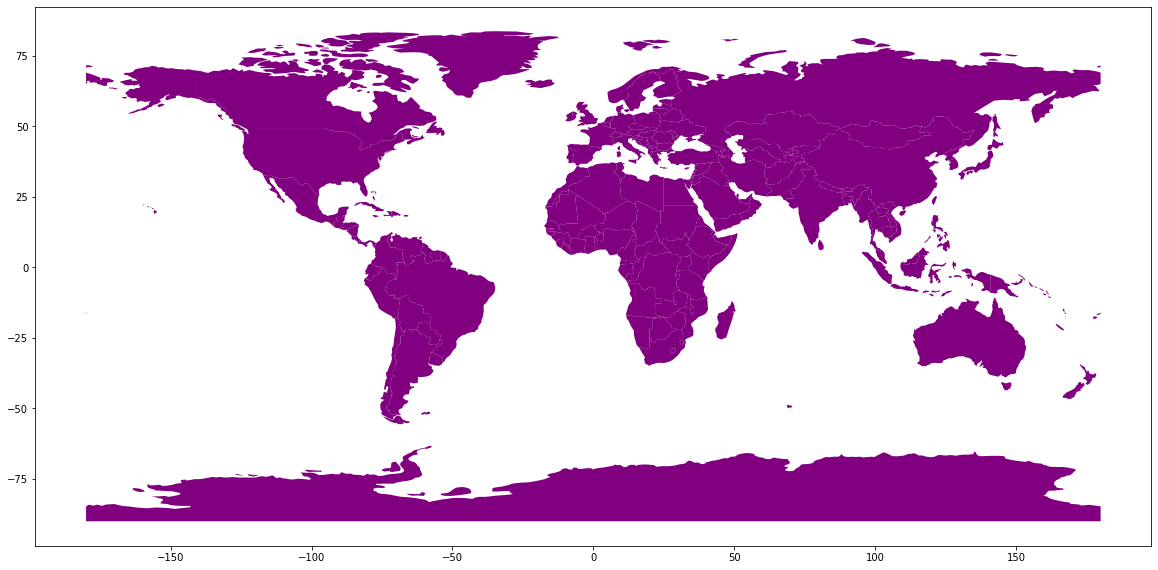

In [15]:
#Importer et visualiser la carte

world = gpd.read_file('110m_cultural/ne_110m_admin_0_countries.shp')
world.plot(color='purple', figsize=(20,12))

In [13]:
#Joindre les données géogrphiques à notre carte

df_map = df_name.set_index("name").join(world.set_index("NAME_EN"), how="right").reset_index()
df_map['count'] = df_map['count'].fillna(0)
df_map.head()

,NAME_EN,count,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Fiji,0.0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,0.0,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,0.0,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,307.0,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,0.0,Admin-0 country,1,2,United States of America,US1,1,2,Country,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


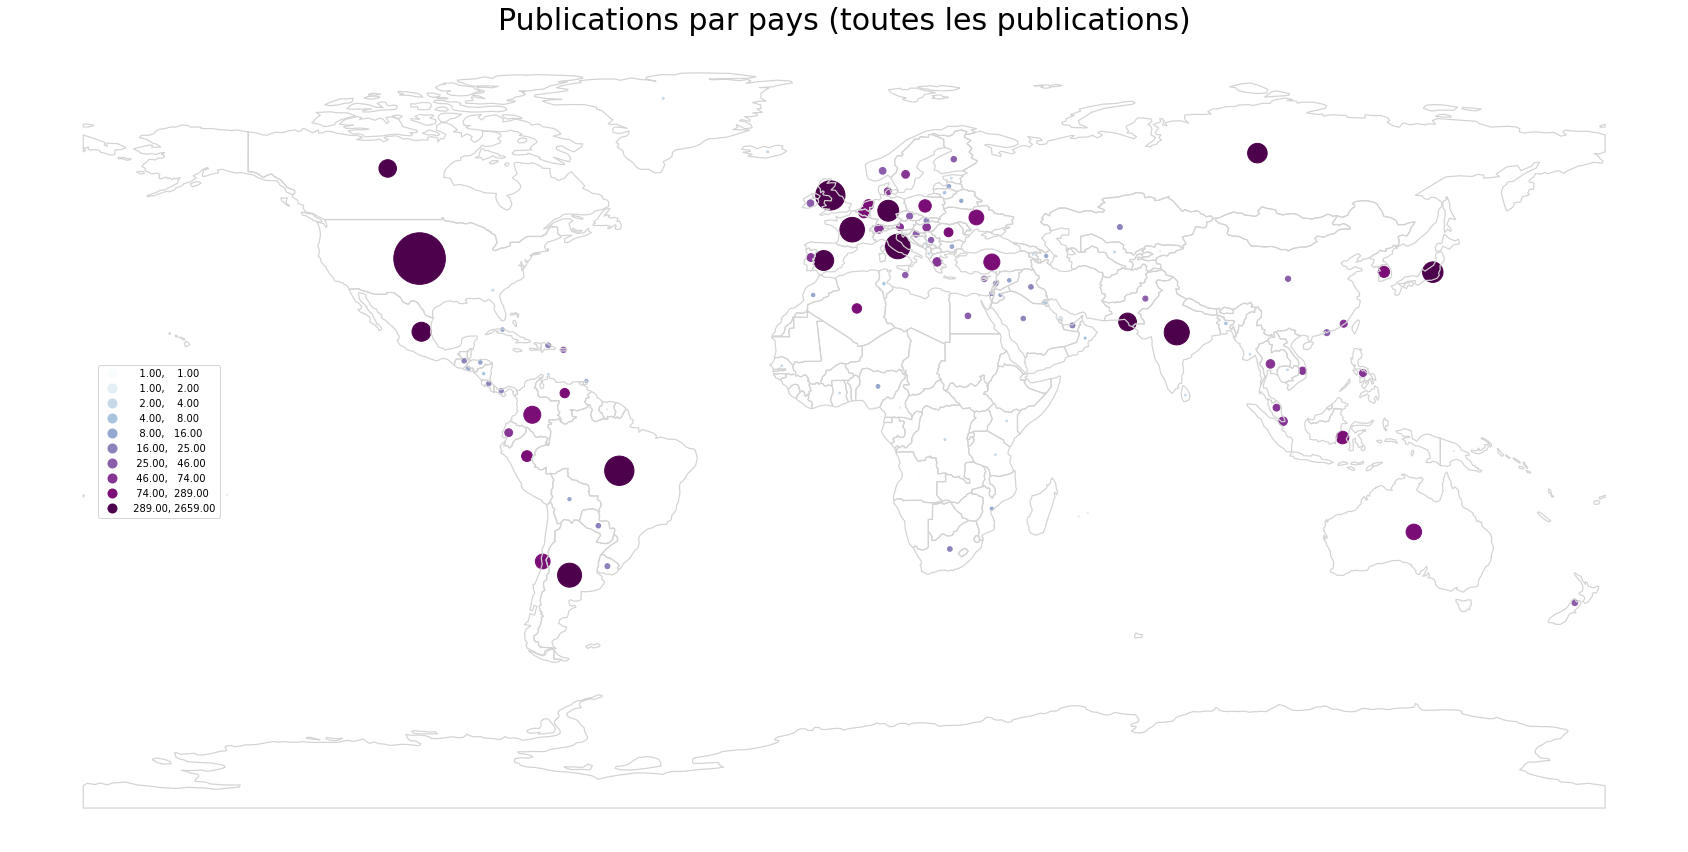

In [52]:
#Visualiser sur carte
#inspiré du cours Artlas Genève

ax = gdf.dropna().plot(column='count',
                       cmap='BuPu',
                       figsize=(30,22),
                       scheme='quantiles',
                       k=10,
                       legend = True,
                       markersize=gdf['count'])
world.boundary.plot(ax=ax, color='lightgrey', linewidth=1.2)
ax.set_title('Publications par pays (toutes les publications)',fontdict= {'fontsize':30})
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((.13,.6))

#plt.savefig("map_all.svg") #Sauvegarder

# Cartographier les sous-corpus

**Sous-corpus "art"**

In [53]:
dfArt.name.value_counts()

Namibia      9932
Brazil        268
Argentina     178
India         123
Italy         123
             ... 
Estonia         1
Israel          1
Bermuda         1
Latvia          1
Kuwait          1
Name: name, Length: 62, dtype: int64

In [54]:
dfArt.country.value_counts()

BR    268
AR    178
IN    123
IT    123
MX    103
     ... 
IL      1
BA      1
HT      1
BO      1
LV      1
Name: country, Length: 61, dtype: int64

In [70]:
#Nettoyage

dfArt = dfArt[dfArt.name != 'Namibia']
dfArt = dfArt.dropna(subset=['name'])

print(f'Publications avec localisation : {len(dfArt)}')

Publications avec localisation : 1707


In [57]:
#Compter les pays

countriesArt= Counter(dfArt['name'].sort_values(ascending=True).tolist()).most_common(150)
countriesArt

[('Brazil', 268),
 ('Argentina', 178),
 ('India', 123),
 ('Italy', 123),
 ('Mexico', 103),
 ('Germany', 99),
 ('Japan', 95),
 ('France', 94),
 ('Australia', 87),
 ('Iran Islamic Republic of', 87),
 ('Canada', 48),
 ('Colombia', 43),
 ('Belgium', 37),
 ('Austria', 34),
 ('Korea Republic of', 32),
 ('Algeria', 30),
 ('Indonesia', 27),
 ('Chile', 26),
 ('Greece', 14),
 ('Czech Republic', 10),
 ('Ecuador', 9),
 ('Malaysia', 8),
 ('Cyprus', 7),
 ('Bangladesh', 6),
 ('Dominican Republic', 6),
 ('Finland', 6),
 ('Hong Kong', 6),
 ('Hungary', 6),
 ('Iraq', 6),
 ('Kazakhstan', 6),
 ('Lebanon', 6),
 ('Malta', 6),
 ('Croatia', 5),
 ('Denmark', 5),
 ('Guatemala', 5),
 ('Azerbaijan', 4),
 ('Bulgaria', 4),
 ('Egypt', 4),
 ('Honduras', 4),
 ('Jordan', 4),
 ('Mozambique', 4),
 ('Albania', 3),
 ('Belarus', 3),
 ('El Salvador', 3),
 ('Lithuania', 3),
 ('China', 2),
 ('Congo the Democratic Republic of the', 2),
 ('Cuba', 2),
 ('Ireland', 2),
 ('Bermuda', 1),
 ('Bolivia Plurinational State of', 1),
 ('Bos

In [58]:
#Créer une dataframe pour les pays

dfArt_name = pd.DataFrame(countriesArt, columns=['name', 'count']) 
dfArt_name.head()

,name,count
0,Brazil,268
1,Argentina,178
2,India,123
3,Italy,123
4,Mexico,103


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'Argentina'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Italy'),
  Text(4, 0, 'Mexico'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Australia'),
  Text(9, 0, 'Iran Islamic Republic of'),
  Text(10, 0, 'Canada'),
  Text(11, 0, 'Colombia'),
  Text(12, 0, 'Belgium'),
  Text(13, 0, 'Austria'),
  Text(14, 0, 'Korea Republic of'),
  Text(15, 0, 'Algeria'),
  Text(16, 0, 'Indonesia'),
  Text(17, 0, 'Chile'),
  Text(18, 0, 'Greece'),
  Text(19, 0, 'Czech Republic'),
  Text(20, 0, 'Ecuador'),
  Text(21, 0, 'Malaysia'),
  Text(22, 0, 'Cyprus'),
  Text(23, 0, 'Bangladesh'),
  Text(24, 0, 'Dominican Republic'),
  Text(25, 0, 'Finland'),
  Text(26, 0, 

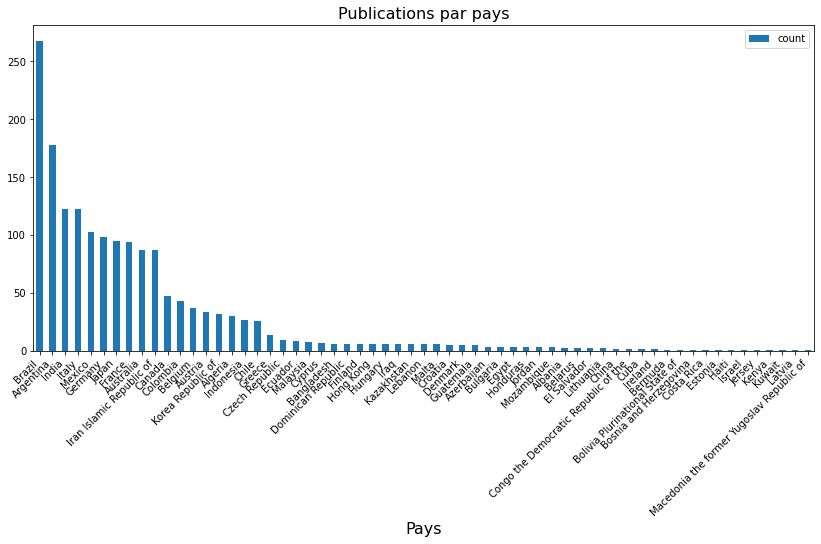

In [59]:
#Visualisation de publications par pays

ax = dfArt_name.set_index("name").plot(kind = "bar", figsize=(14,6))
ax.set_xlabel("Pays", fontsize=16)
plt.title("Publications par pays", fontsize=16)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize=10)

In [60]:
#Transformation des noms

list_countriesArt = dfArt_name['name'].to_list()
gdfArt = gpd.tools.geocode(list_countriesArt, provider='nominatim',timeout=10, user_agent="adrien.jeanrenaud@hotmail.fr")

In [61]:
gdfArt["count"]=dfArt_name["count"]
gdfArt.head()

,geometry,address,count
0,POINT (-53.20000 -10.33333),Brasil,268
1,POINT (-64.96728 -34.99650),Argentina,178
2,POINT (78.66774 22.35111),India,123
3,POINT (12.67430 42.63843),Italia,123
4,POINT (-100.00004 22.50005),México,103


<AxesSubplot:>

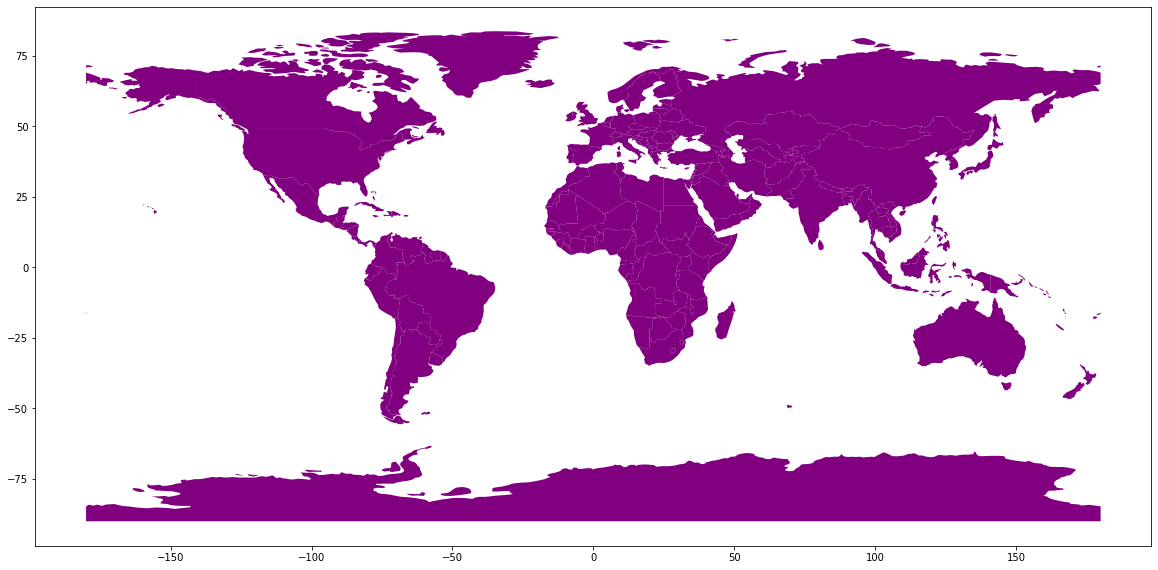

In [62]:
#Importer et visualiser la carte

worldArt = gpd.read_file('110m_cultural/ne_110m_admin_0_countries.shp')
worldArt.plot(color='purple', figsize=(20,12))

In [63]:
#Joindre les données géogrphiques à notre carte

dfArt_map = dfArt_name.set_index("name").join(worldArt.set_index("NAME_EN"), how="right").reset_index()
dfArt_map['count'] = dfArt_map['count'].fillna(0)
dfArt_map.head()

,NAME_EN,count,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Fiji,0.0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,0.0,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,0.0,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,48.0,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,0.0,Admin-0 country,1,2,United States of America,US1,1,2,Country,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


/Users/JR/.pyenv/versions/3.8.7/envs/img/lib/python3.8/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/Users/JR/.pyenv/versions/3.8.7/envs/img/lib/python3.8/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 9
  Warn("Warning: setting k to %d" % k_q, UserWarning)


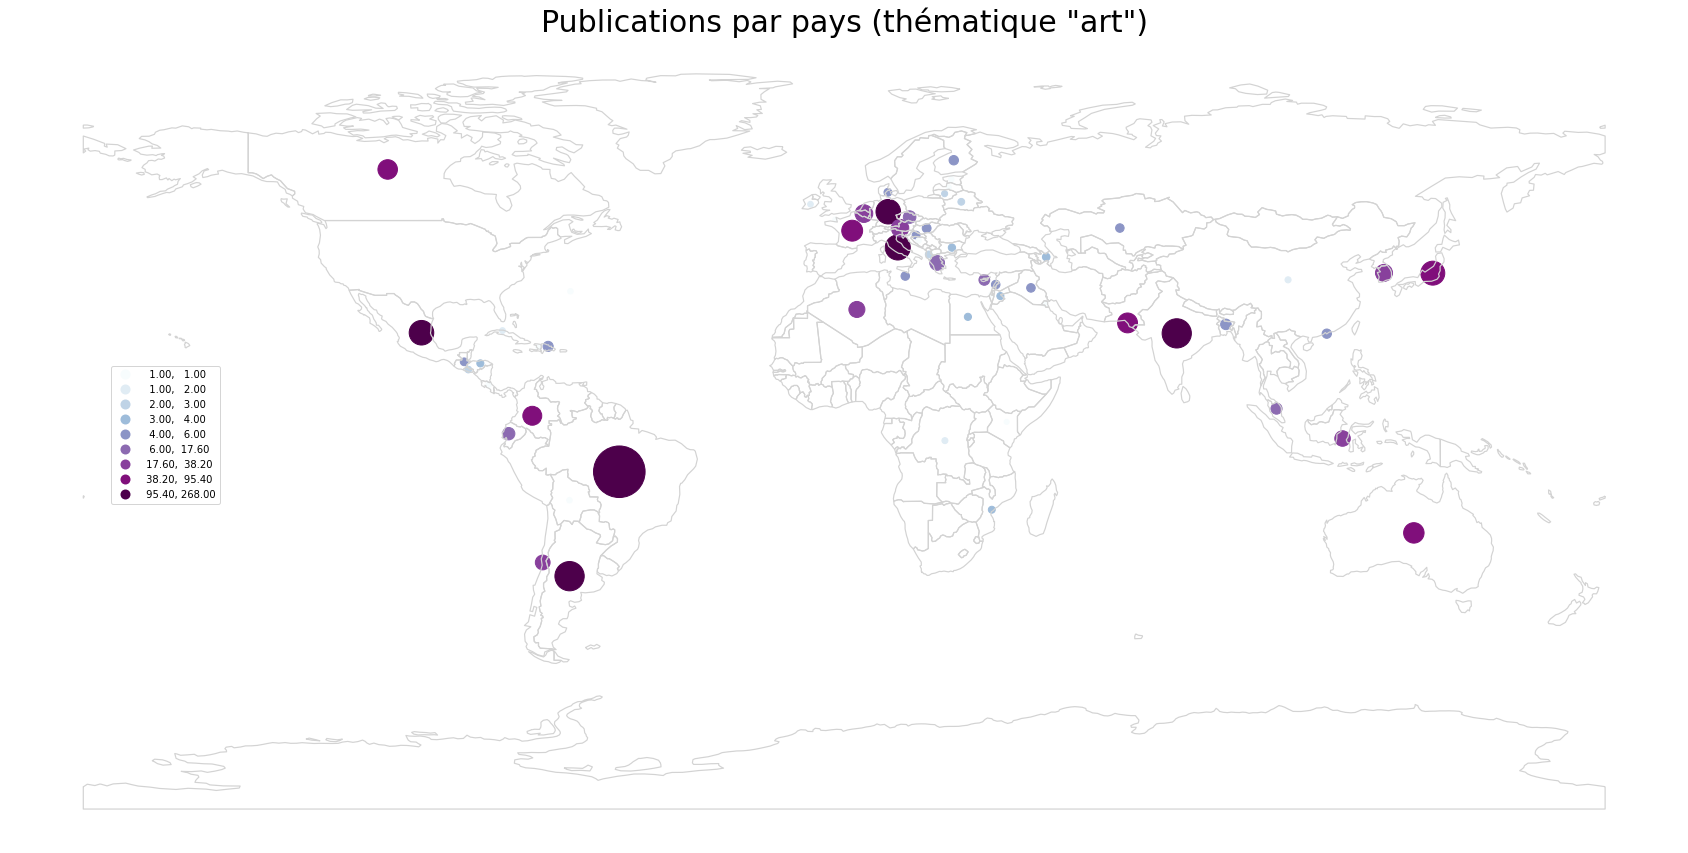

In [65]:
#Visualiser sur carte
#inspiré du cours Artlas Genève

ax = gdfArt.dropna().plot(column='count',
                       cmap='BuPu',
                       figsize=(30,22),
                       scheme='quantiles',
                       k=10,
                       legend = True,
                       markersize=gdf['count'])
worldArt.boundary.plot(ax=ax, color='lightgrey', linewidth=1.2)
ax.set_title('Publications par pays (thématique "art")',fontdict= {'fontsize':30})
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((.13,.6))

#plt.savefig("map_Art.svg") #Sauvegarder

In [66]:
dfEso.name.value_counts()

Namibia                     5545
Brazil                       174
France                        76
India                         74
Germany                       50
Iran Islamic Republic of      36
Italy                         36
Colombia                      29
Canada                        26
Indonesia                     25
Japan                         17
Chile                         13
Mexico                        11
Ecuador                        9
Greece                         7
Croatia                        7
Israel                         5
Costa Rica                     5
Argentina                      4
Honduras                       4
Denmark                        4
Korea Republic of              4
Egypt                          3
Hong Kong                      3
Czech Republic                 2
Ghana                          2
Algeria                        2
Iceland                        1
Malaysia                       1
Bahrain                        1
Morocco   

In [67]:
dfEso.country.value_counts()

BR    174
FR     76
IN     74
DE     50
IR     36
IT     36
CO     29
CA     26
ID     25
JP     17
CL     13
MX     11
EC      9
GR      7
HR      7
CR      5
IL      5
KR      4
HN      4
DK      4
AR      4
HK      3
EG      3
GH      2
CZ      2
DZ      2
KH      1
CN      1
IS      1
KE      1
MA      1
CM      1
MY      1
BH      1
GT      1
LU      1
CY      1
DO      1
Name: country, dtype: int64

In [69]:
#Nettoyage

dfEso = dfEso[dfEso.name != 'Namibia']
dfEso = dfEso.dropna(subset=['name'])

print(f'Publications avec localisation : {len(dfEso)}')

Publications avec localisation : 640


In [71]:
#Compter les pays

countriesEso = Counter(dfEso['name'].sort_values(ascending=True).tolist()).most_common(150)
countriesEso

[('Brazil', 174),
 ('France', 76),
 ('India', 74),
 ('Germany', 50),
 ('Iran Islamic Republic of', 36),
 ('Italy', 36),
 ('Colombia', 29),
 ('Canada', 26),
 ('Indonesia', 25),
 ('Japan', 17),
 ('Chile', 13),
 ('Mexico', 11),
 ('Ecuador', 9),
 ('Croatia', 7),
 ('Greece', 7),
 ('Costa Rica', 5),
 ('Israel', 5),
 ('Argentina', 4),
 ('Denmark', 4),
 ('Honduras', 4),
 ('Korea Republic of', 4),
 ('Egypt', 3),
 ('Hong Kong', 3),
 ('Algeria', 2),
 ('Czech Republic', 2),
 ('Ghana', 2),
 ('Bahrain', 1),
 ('Cambodia', 1),
 ('Cameroon', 1),
 ('China', 1),
 ('Cyprus', 1),
 ('Dominican Republic', 1),
 ('Guatemala', 1),
 ('Iceland', 1),
 ('Kenya', 1),
 ('Luxembourg', 1),
 ('Malaysia', 1),
 ('Morocco', 1)]

In [72]:
#Créer une dataframe pour les pays

dfEso_name = pd.DataFrame(countriesEso, columns=['name', 'count']) 
dfEso_name.head()

,name,count
0,Brazil,174
1,France,76
2,India,74
3,Germany,50
4,Iran Islamic Republic of,36


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'France'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Iran Islamic Republic of'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Colombia'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Indonesia'),
  Text(9, 0, 'Japan'),
  Text(10, 0, 'Chile'),
  Text(11, 0, 'Mexico'),
  Text(12, 0, 'Ecuador'),
  Text(13, 0, 'Croatia'),
  Text(14, 0, 'Greece'),
  Text(15, 0, 'Costa Rica'),
  Text(16, 0, 'Israel'),
  Text(17, 0, 'Argentina'),
  Text(18, 0, 'Denmark'),
  Text(19, 0, 'Honduras'),
  Text(20, 0, 'Korea Republic of'),
  Text(21, 0, 'Egypt'),
  Text(22, 0, 'Hong Kong'),
  Text(23, 0, 'Algeria'),
  Text(24, 0, 'Czech Republic'),
  Text(25, 0, 'Ghana'),
  Text(26, 0, 'Bahrain'),
  Text(27, 0, 'Cambodia'),
  Text(28, 0, 'Cameroon'),
  Text(29, 0, 'China'),
  Text(30, 0, 'Cyprus'),


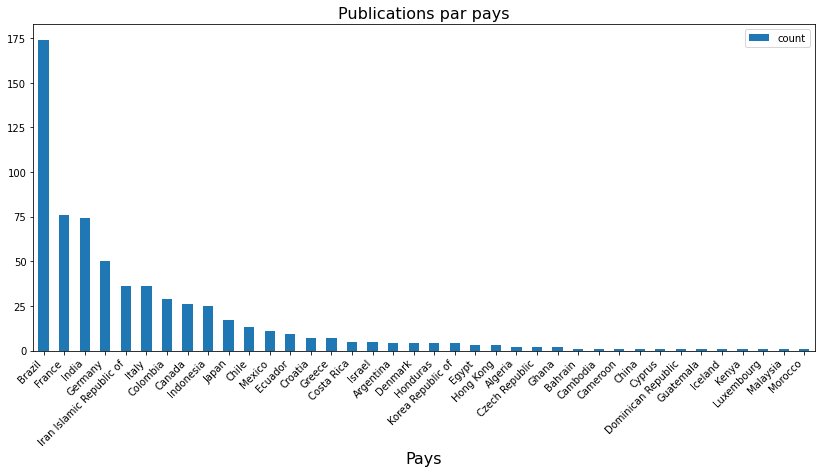

In [73]:
#Visualisation de publications par pays

ax = dfEso_name.set_index("name").plot(kind = "bar", figsize=(14,6))
ax.set_xlabel("Pays", fontsize=16)
plt.title("Publications par pays", fontsize=16)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize=10)

In [74]:
#Transformation des noms

list_countriesEso = dfEso_name['name'].to_list()
gdfEso = gpd.tools.geocode(list_countriesEso, provider='nominatim',timeout=10, user_agent="adrien.jeanrenaud@hotmail.fr")

In [75]:
gdfEso["count"]=dfEso_name["count"]
gdfEso.head()

,geometry,address,count
0,POINT (-53.20000 -10.33333),Brasil,174
1,POINT (1.88833 46.60335),France,76
2,POINT (78.66774 22.35111),India,74
3,POINT (10.42345 51.08342),Deutschland,50
4,POINT (67.03297 24.81862),"Iran, اسٹریٹ 1, Old Clifton, کلفٹن, کراچی, سند...",36


<AxesSubplot:>

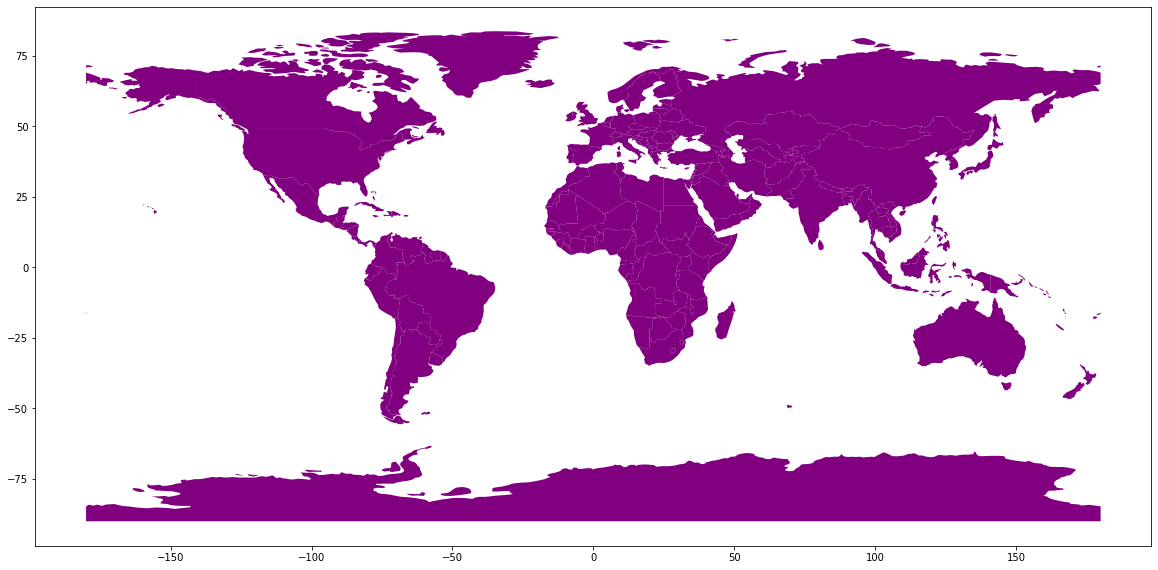

In [76]:
#Importer et visualiser la carte

worldEso = gpd.read_file('110m_cultural/ne_110m_admin_0_countries.shp')
worldEso.plot(color='purple', figsize=(20,12))

In [77]:
#Joindre les données géogrphiques à notre carte

dfEso_map = dfEso_name.set_index("name").join(worldEso.set_index("NAME_EN"), how="right").reset_index()
dfEso_map['count'] = dfEso_map['count'].fillna(0)
dfEso_map.head()

,NAME_EN,count,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Fiji,0.0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,0.0,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,0.0,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,26.0,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,0.0,Admin-0 country,1,2,United States of America,US1,1,2,Country,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


/Users/JR/.pyenv/versions/3.8.7/envs/img/lib/python3.8/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/Users/JR/.pyenv/versions/3.8.7/envs/img/lib/python3.8/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 9
  Warn("Warning: setting k to %d" % k_q, UserWarning)


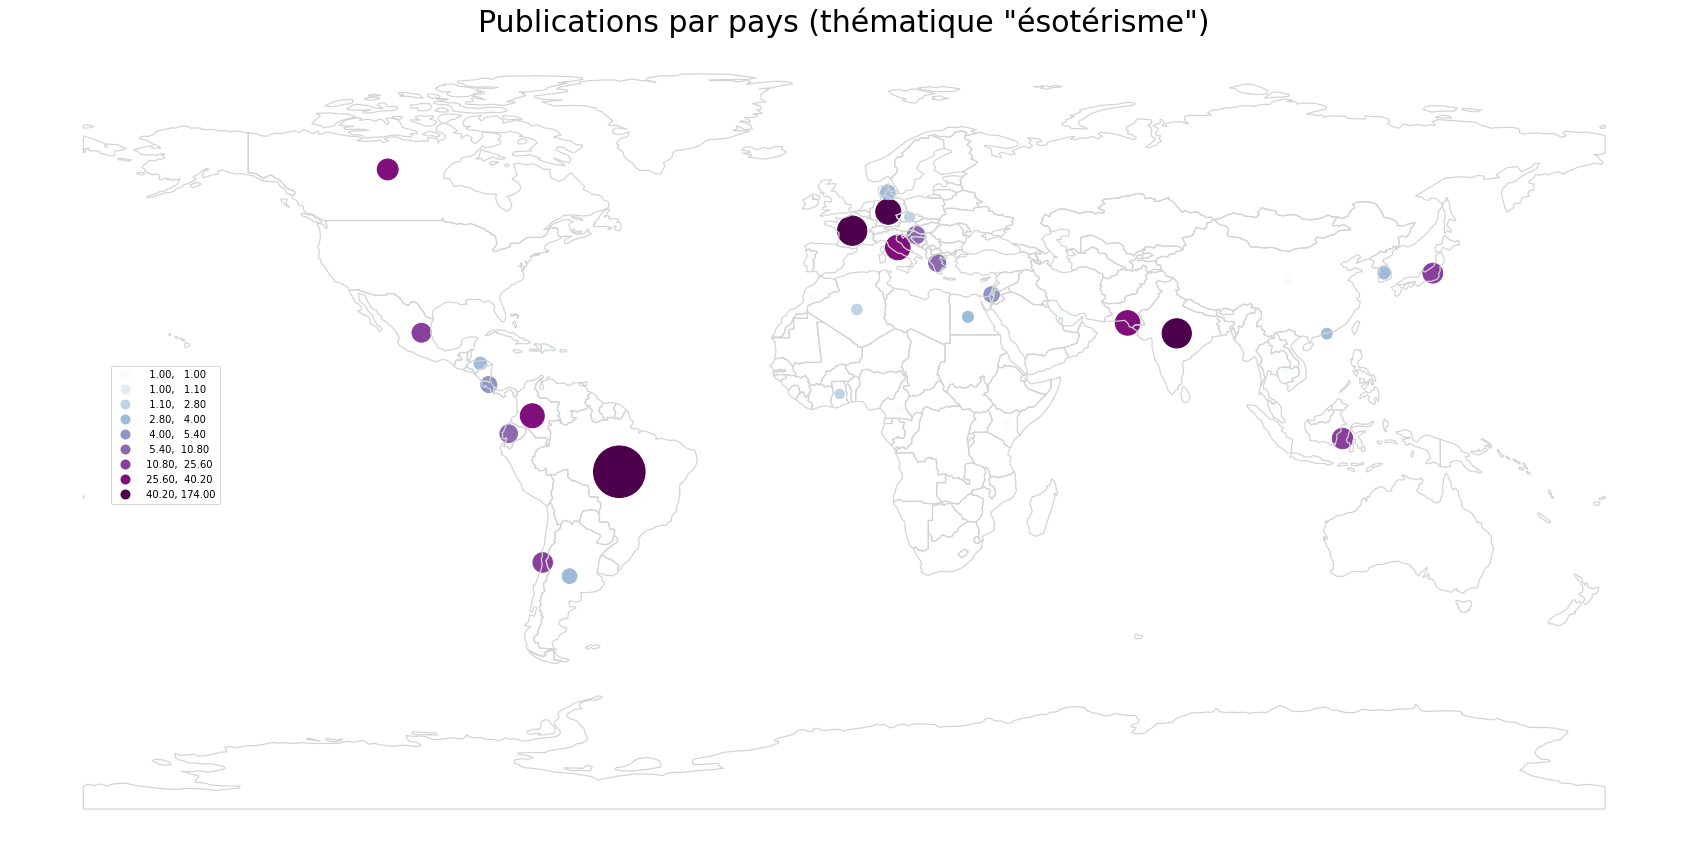

In [79]:
#Visualiser sur carte
#inspiré du cours Artlas Genève

ax = gdfEso.dropna().plot(column='count',
                       cmap='BuPu',
                       figsize=(30,22),
                       scheme='quantiles',
                       k=10,
                       legend = True,
                       markersize=gdf['count'])
worldEso.boundary.plot(ax=ax, color='lightgrey', linewidth=1.2)
ax.set_title('Publications par pays (thématique "ésotérisme")',fontdict= {'fontsize':30})
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((.13,.6))

#plt.savefig("map_eso.svg") #Sauvegarder